In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import pyreadr

from utils import helpers

from importlib import reload

In [4]:
# Load Outfield Data

outfield_dims = pyreadr.read_r('fences.rds')[None]

outfield_dims['spray_angle'] = outfield_dims.apply(lambda x: helpers.spray_angle(x.x, x.y),1) 

outfield_dims['team_abv'] = outfield_dims['team'].apply(lambda x: helpers.mapping[x])

In [5]:
outfield_dims.to_csv('fences.csv')

In [8]:
new_dims.query('team == "angels" and segment == "outfield_outer"')

,team,x,y,segment
401,angels,26.270000,104.810000,outfield_outer
402,angels,25.932060,98.807795,outfield_outer
403,angels,26.551758,92.865560,outfield_outer
404,angels,29.069971,87.457350,outfield_outer
405,angels,32.986155,82.913310,outfield_outer
...,...,...,...,...
496,angels,32.618710,127.222803,outfield_outer
497,angels,29.003184,122.419820,outfield_outer
498,angels,27.310342,116.780127,outfield_outer
499,angels,26.598417,110.812734,outfield_outer


In [9]:
outfield_dims['segment'].unique()

array(['outfield_outer'], dtype=object)

In [7]:
new_dims = pd.read_csv('mlb_stadia_paths.csv')

In [10]:
new_dims

,team,x,y,segment
0,angels,125.180000,204.530000,foul_lines
1,angels,121.153213,200.501574,foul_lines
2,angels,117.126427,196.473147,foul_lines
3,angels,113.099640,192.444721,foul_lines
4,angels,109.072854,188.416295,foul_lines
...,...,...,...,...
15727,generic,128.838384,203.636364,outfield_outer
15728,generic,127.878788,204.727273,outfield_outer
15729,generic,126.919192,205.818182,outfield_outer
15730,generic,125.959596,206.909091,outfield_outer


In [11]:
helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y')

,team,x,y,segment,x_,y_
0,angels,125.180000,204.530000,foul_lines,0.449221,-13.801061
1,angels,121.153213,200.501574,foul_lines,-9.600314,-3.747434
2,angels,117.126427,196.473147,foul_lines,-19.649848,6.306193
3,angels,113.099640,192.444721,foul_lines,-29.699382,16.359819
4,angels,109.072854,188.416295,foul_lines,-39.748917,26.413446
...,...,...,...,...,...,...
15727,generic,128.838384,203.636364,outfield_outer,9.579343,-11.570838
15728,generic,127.878788,204.727273,outfield_outer,7.184507,-14.293388
15729,generic,126.919192,205.818182,outfield_outer,4.789672,-17.015939
15730,generic,125.959596,206.909091,outfield_outer,2.394836,-19.738489


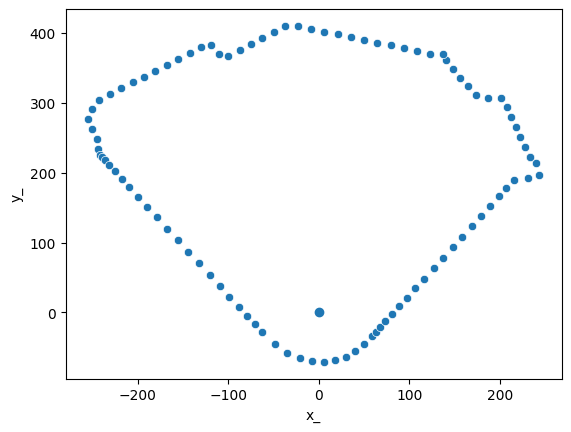

In [12]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "orioles" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')

# get distance from 0,0 to each point for updated stuff

In [13]:
outfield_dims.query('stadium == "Oriole Park at Camden Yards"')['fence_height'].unique()

array([21.,  7.])

<AxesSubplot: xlabel='x', ylabel='y'>

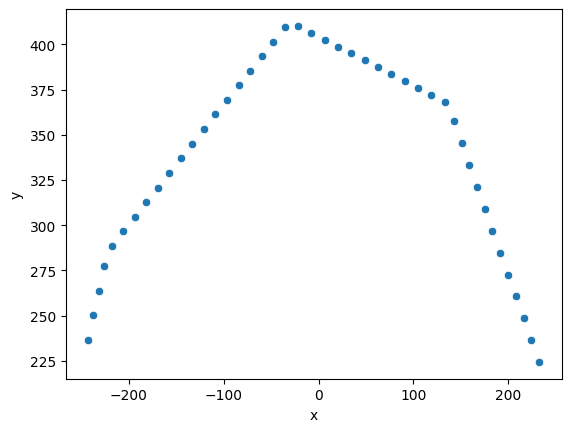

In [14]:
sns.scatterplot(outfield_dims.query('stadium == "Oriole Park at Camden Yards"'), x='x', y='y')

In [15]:
# Load Hits Data

hits_df = pd.read_csv('total_big_hits.csv',index_col=0)

hits_df = (
    hits_df.assign(game_date = pd.to_datetime(hits_df['game_date'],infer_datetime_format=True))
                 .assign(year = lambda x: x['game_date'].dt.year)
)

hits_df = helpers.mlbam_xy_transformation(hits_df)
hits_df['spray_angle_true'] = hits_df.apply(lambda x: helpers.spray_angle(x.hc_x_, x.hc_y_),1)
hits_df['launch_speed_fts'] = hits_df['launch_speed'] * 5280 / 3600
hits_df['launch_angle_rads'] = np.deg2rad(hits_df['launch_angle']) 

C:\Users\noahs\AppData\Local\Temp\ipykernel_9504\1637602040.py:3: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  hits_df = pd.read_csv('total_big_hits.csv',index_col=0)


In [132]:
hits_df['num_homers'] = hits_df[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.num_homers(x[0],x[1],x[2],x[3],x[4],x[5]),1)

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:241: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:235: RuntimeWarning: invalid value encountered in sqrt
  total_time = -(launch_speed_y + np.sqrt(launch_speed_y**2 + (2*g * plate_z))) / g


In [94]:
hits_df = pd.read_csv('data/hits_output.csv',index_col=None).drop('Unnamed: 0',1)

C:\Users\noahs\AppData\Local\Temp\ipykernel_9504\4231309284.py:1: DtypeWarning: Columns (44) have mixed types. Specify dtype option on import or set low_memory=False.
  hits_df = pd.read_csv('data/hits_output.csv',index_col=None).drop('Unnamed: 0',1)
C:\Users\noahs\AppData\Local\Temp\ipykernel_9504\4231309284.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  hits_df = pd.read_csv('data/hits_output.csv',index_col=None).drop('Unnamed: 0',1)


In [96]:
ids = pd.read_csv('data/players_id.csv')

In [97]:
hits_df = hits_df.merge(ids[['MLBID','PLAYERNAME']],how='left',left_on='batter',right_on='MLBID')

In [98]:
from pybaseball import playerid_reverse_lookup

In [117]:
hits_df['batter_name'] = hits_df['batter'].apply(lambda x: batter_player(x),1)

In [116]:
def batter_player(x):
    try:
        text = ', '.join([part.title() for part in playerid_reverse_lookup(player_ids=[x])[['name_last','name_first']].agg(', '.join,axis=1).item().split(', ')])
    except:
        text = 'NA'
    return text

In [118]:
hits_df = hits_df.query('batter_name.notnull()')

In [122]:
hits_df.to_csv('hits_output.csv')

In [112]:
hits_df = hits_df.query('spray_angle_true.notnull()').reset_index(drop=True)

In [113]:
hits_df['true_homerun'] = hits_df['num_homers'].apply(lambda x: 1 if x == 30 else 0)

In [114]:
hits_df = hits_df.query('game_date > "2022-04-07" and game_date < "2022-10-06"')

In [119]:
aj = hits_df.query('batter_name == "Judge, Aaron" and year == 2022')

In [74]:
aj['game_date'].min()

'2022-03-27'

In [123]:
aj.query('events != "home_run"')['num_homers'].value_counts()

0     72
1      4
11     3
2      3
5      2
17     1
15     1
30     1
23     1
Name: num_homers, dtype: int64

In [217]:
aj.query('num_homers == 1')[['game_date','player_name','events']]

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,hc_y_,spray_angle_true,launch_speed_fts,launch_angle_rads,num_homers,MLBID,PLAYERNAME,batter_name,batter_name_final,true_homerun
193665,FC,2022-09-23,83.6,1.58,5.68,"Hill, Rich",592450,448179,field_out,hit_into_play,...,313.930455,-22.350576,161.480000,0.767945,1,592450.0,Aaron Judge,"Judge, Aaron","Judge, Aaron",0
201220,FF,2022-08-08,96.6,-0.83,6.10,"Gilbert, Logan",592450,669302,field_out,hit_into_play,...,351.165866,-17.542326,137.720000,0.488692,1,592450.0,Aaron Judge,"Judge, Aaron","Judge, Aaron",0
203261,FF,2022-07-27,95.2,-3.17,5.69,"Scherzer, Max",592450,453286,field_out,hit_into_play,...,294.264568,31.409709,154.293333,0.698132,1,592450.0,Aaron Judge,"Judge, Aaron","Judge, Aaron",0
210279,SI,2022-06-14,89.7,-1.86,5.05,"Kluber, Corey",592450,446372,field_out,hit_into_play,...,264.216689,-34.638550,147.840000,0.715585,1,592450.0,Aaron Judge,"Judge, Aaron","Judge, Aaron",0
221591,SI,2022-04-04,93.0,-2.16,6.08,"Gibson, Kyle",592450,502043,double,hit_into_play,...,360.774200,19.043926,155.760000,0.383972,1,592450.0,Aaron Judge,"Judge, Aaron","Judge, Aaron",0
221716,FF,2022-04-02,99.1,-1.91,5.47,"Strider, Spencer",592450,675911,home_run,hit_into_play,...,288.000433,34.875227,151.946667,0.418879,1,592450.0,Aaron Judge,"Judge, Aaron","Judge, Aaron",0
222007,FF,2022-03-27,94.4,-2.24,6.33,"Brubaker, JT",592450,664141,home_run,hit_into_play,...,365.765542,18.644625,167.933333,0.296706,1,592450.0,Aaron Judge,"Judge, Aaron","Judge, Aaron",0


In [223]:
aj.query('events != "home_run" and num_homers == 30')

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,hc_y_,spray_angle_true,launch_speed_fts,launch_angle_rads,num_homers,MLBID,PLAYERNAME,batter_name,batter_name_final,true_homerun
215052,ST,2022-05-17,78.8,-1.88,6.36,"Watkins, Spenser",592450,657093,double,hit_into_play,...,314.155065,-25.324845,147.84,0.523599,30,592450.0,Aaron Judge,"Judge, Aaron","Judge, Aaron",1


In [212]:
aj.groupby('home_team').agg(sum_true_hr=('true_homerun','sum')).reset_index().sort_values('sum_true_hr',ascending=False)

,home_team,sum_true_hr
11,NYY,18
0,BAL,4
6,KC,2
16,TB,2
1,BOS,2
8,MIL,2
18,TOR,2
7,LAA,1
5,HOU,1
10,NYM,1


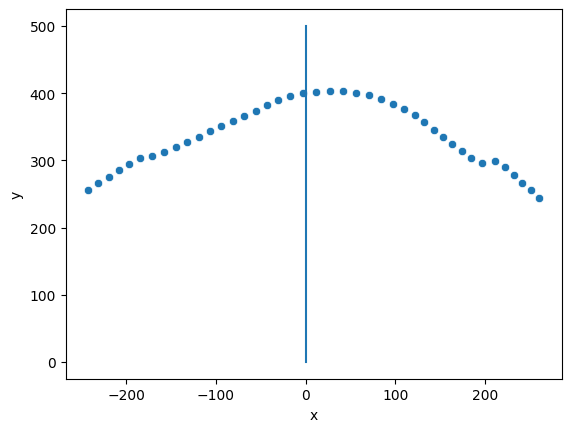

<AxesSubplot: xlabel='spray_angle_true', ylabel='Count'>

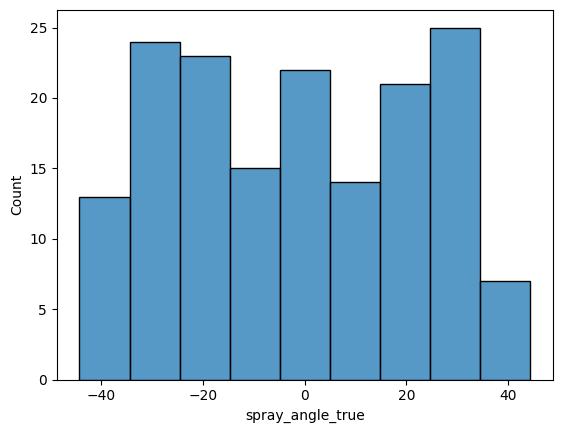

In [71]:
sns.histplot(aj['spray_angle_true'])

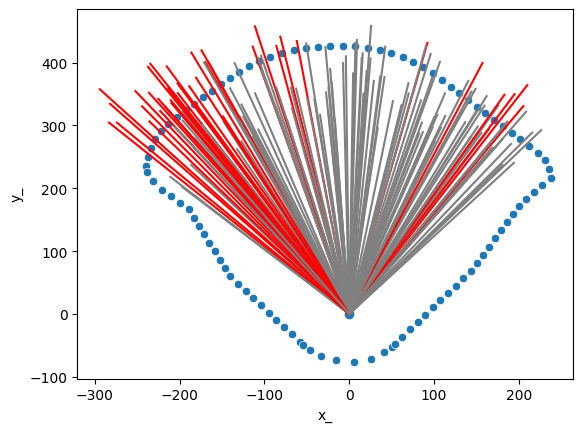

In [130]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
for x, y, hr in zip(aj['hc_x_'], aj['hc_y_'],aj['true_homerun']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

In [ ]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
for x, y, hr in zip(aj['hc_x_'], aj['hc_y_'],aj['true_homerun']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

In [137]:
hits_df['home_team'].unique()

array(['BAL', 'BOS', 'CIN', 'CLE', 'HOU', 'LAD', 'NYM', 'OAK', 'PIT',
       'SD', 'SEA', 'TEX', 'CWS', 'MIA', 'MIL', 'LAA', 'CHC', 'DET', 'SF',
       'STL', 'TOR', 'ATL', 'NYY', 'WSH', 'MIN', 'AZ', 'COL', 'KC', 'TB',
       'PHI'], dtype=object)

In [134]:
reload(helpers)

<module 'utils.helpers' from 'c:\\Users\\noahs\\Documents\\Projects\\YouTube-Code\\utils\\helpers.py'>

In [139]:
hr_count = []
for t in hits_df['home_team'].unique():
    hr_count.append(aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.is_home_run_new_team(x[0],x[1],x[2],x[3],x[4],x[5],t),1).sum())

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:275: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:275: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:275: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:275: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:275: RuntimeWarning: inv

In [140]:
pd.DataFrame(zip(hits_df['home_team'].unique(), hr_count), columns=['Stadium','HR Count']).sort_values('HR Count',ascending=False)

,Stadium,HR Count
2,CIN,69
26,COL,67
24,MIN,67
14,MIL,66
29,PHI,64
8,PIT,64
10,SEA,64
16,CHC,64
3,CLE,63
21,ATL,63


In [191]:
# Scheduling

sched = pd.read_csv('data/mlb_sched.csv')

In [190]:
def judge_sched(team, mlb_sched, judge_game_map):
    team_sched = mlb_sched[mlb_sched['Tm']==team]
    judge_game_map = judge_game_map.merge(team_sched[['Game_Num','Field']],left_on='Game_Num',right_on='Game_Num')
    return judge_game_map

In [189]:
pd.read_csv('data/judge_hit_map.csv')

,Unnamed: 0,game_date,hc_x,hc_y,launch_angle,hit_distance_sc,events,pitch_name,player_name,Game_Num
0,0,2022-10-04,168.33,80.14,43.0,314,field_out,4-Seam Fastball,"Gray, Jon",160
1,1,2022-10-04,38.02,66.80,35.0,391,home_run,Slider,"Tinoco, Jesus",161
2,2,2022-09-28,52.20,64.43,22.0,394,home_run,Sinker,"Mayza, Tim",155
3,3,2022-09-25,90.36,67.13,44.0,338,field_out,Slider,"Bello, Brayan",152
4,4,2022-09-24,131.74,58.54,43.0,348,field_out,4-Seam Fastball,"Pivetta, Nick",151
...,...,...,...,...,...,...,...,...,...,...
166,166,2022-04-14,116.78,51.50,28.0,366,field_out,4-Seam Fastball,"Gausman, Kevin",7
167,167,2022-04-14,149.67,65.92,27.0,335,field_out,4-Seam Fastball,"Gausman, Kevin",7
168,168,2022-04-13,52.63,48.37,27.0,413,home_run,Sinker,"Berríos, José",6
169,169,2022-04-12,46.34,75.71,29.0,361,field_out,Cutter,"Kikuchi, Yusei",5


In [141]:
aj['temp_hr'] = aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.is_home_run_new_team(x[0],x[1],x[2],x[3],x[4],x[5],'NYY'),1)

c:\Users\noahs\Documents\Projects\YouTube-Code\utils\helpers.py:275: RuntimeWarning: invalid value encountered in sqrt
  time_wall = (-launch_speed_x + np.sqrt(launch_speed_x**2 + 2*acceleration_x*wall_distance))/acceleration_x
C:\Users\noahs\AppData\Local\Temp\ipykernel_9504\842162949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aj['temp_hr'] = aj[['launch_speed_fts','launch_angle_rads','plate_z','hit_distance_sc','spray_angle_true','home_team']].apply(lambda x: helpers.is_home_run_new_team(x[0],x[1],x[2],x[3],x[4],x[5],'NYY'),1)


In [158]:
aj.query('spray_angle_true <= 10 and spray_angle_true >= -30 and temp_hr == 1 and hc_y_ <= 350')[['hc_x_','hc_y_']]

,hc_x_,hc_y_
192846,-181.684849,335.842446
215052,-148.667121,314.155065


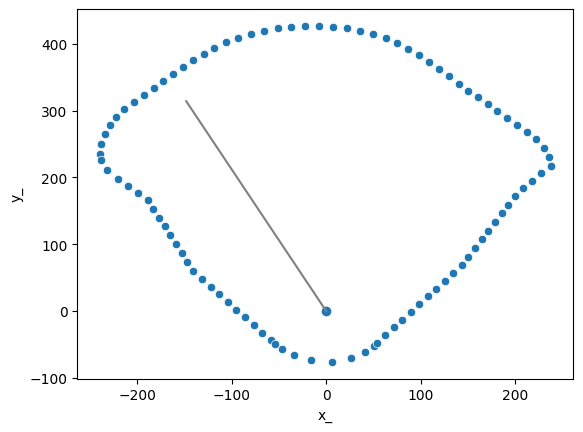

In [149]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
plt.plot([0,-148],[0,314],'grey')


In [186]:
aj.query('hc_x_ >= -120 and hc_x_ <= 100 and temp_hr == 0 and hit_distance_sc >= 395')[['game_date','home_team','events','hc_x_','hc_y_','spray_angle_true','hit_distance_sc']].sort_values('hc_x_')

,game_date,home_team,events,hc_x_,hc_y_,spray_angle_true,hit_distance_sc
214071,2022-05-23,NYY,home_run,-107.563420,407.767685,-14.777216,418
202487,2022-08-01,NYY,home_run,-104.069481,410.912230,-14.212147,420
211109,2022-06-09,MIN,double,-103.370693,388.151711,-14.912614,397
220344,2022-04-14,NYY,double,-50.736991,430.378464,-6.723523,401
215045,2022-05-17,BAL,home_run,-28.101255,424.613464,-3.786359,422
199817,2022-08-17,NYY,field_out,-7.312316,398.982923,-1.049965,395
204045,2022-07-23,BAL,double,-3.968117,409.938918,-0.554593,405
198272,2022-08-26,OAK,home_run,7.362229,431.276906,0.977988,427
211474,2022-06-07,MIN,home_run,9.184069,435.893897,1.207015,431
201359,2022-08-07,STL,double,14.724459,406.919157,2.072356,403


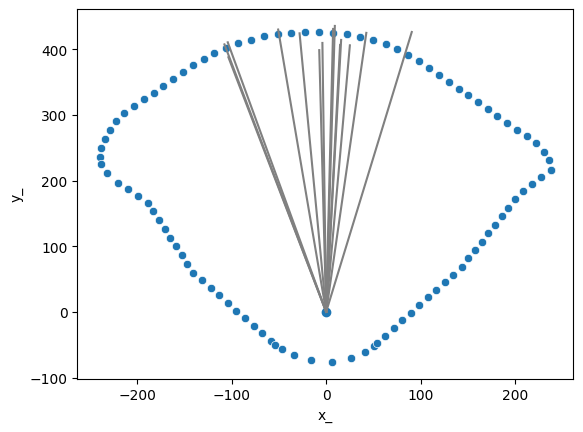

In [179]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
temp = aj.query('hc_x_ >= -120 and hc_x_ <= 100 and temp_hr == 0 and hit_distance_sc >= 395')
for x, y, hr in zip(temp['hc_x_'], temp['hc_y_'],temp['temp_hr']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

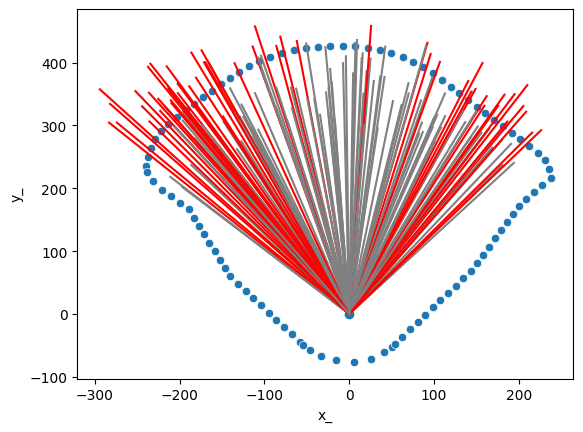

In [142]:
sns.scatterplot(helpers.mlbam_xy_transformation(data=new_dims, x='x',y='y').query('team == "yankees" and segment == "outfield_outer"'), x='x_', y='y_')
plt.plot(0,0,marker='o')
for x, y, hr in zip(aj['hc_x_'], aj['hc_y_'],aj['temp_hr']):
    if hr == 0:
        plt.plot([0,x],[0,y],'grey')
    else:
        plt.plot([0,x],[0,y],'red')

In [4]:
# Best power hitter, how is that determined?
# just avg distance?
# highest home run percentage?
# 

<AxesSubplot: >

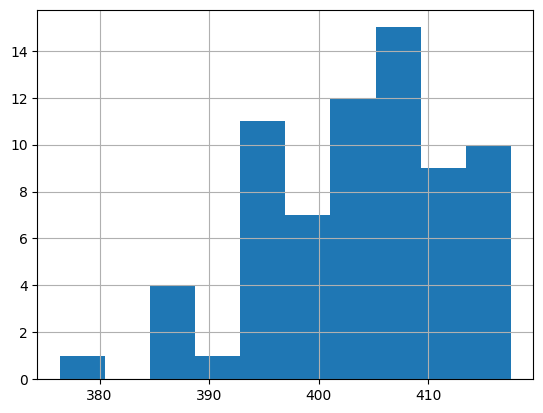

In [12]:
# This is best avg home run hit distance

(
    hits_data.query("events == 'Home Run'")
    .groupby('player_name').agg(avg_hit_dist=('hit_distance_sc','mean'),
                                num_hits=('hit_distance_sc','count'))
    .reset_index()
    .query('num_hits >= 15')
    .sort_values('avg_hit_dist',ascending=False)['avg_hit_dist'].hist()
    )

(0.0, 9.0)

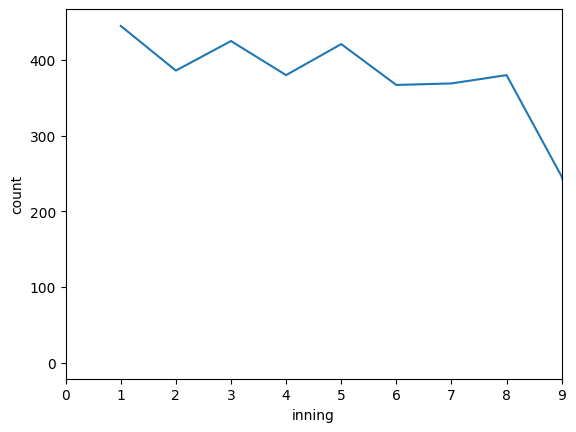

In [69]:
sns.lineplot(hits_data.query('events == "Home Run"').groupby('inning').size().reset_index().rename(columns={0:'count'}),x='inning',y='count')

plt.xlim([0,9])

In [60]:
(
    hits_data.groupby('home_team')['events']
    .count()
    .reset_index()
    .merge(hits_data.query('events == "Home Run"')
                    .groupby('home_team').size().reset_index())
    .rename(columns={0:'dingers'})
    .assign(dinger_perc = lambda x: round(x['dingers'] / x['events'] * 100,2))
    .sort_values('dinger_perc',ascending=False)
)

,home_team,events,dingers,dinger_perc
28,TOR,520,149,28.65
5,CIN,558,155,27.78
2,BAL,517,143,27.66
4,CHC,463,128,27.65
12,LAA,537,145,27.00
13,LAD,529,140,26.47
18,NYY,532,133,25.00
8,CWS,499,123,24.65
6,CLE,488,119,24.39
20,PHI,420,100,23.81


In [32]:
hits_data.query('events == "Home Run"').groupby('home_team').size().sort_values()

home_team
MIA     73
NYM     73
STL     83
DET     88
PIT     90
KC      93
TB      95
SF      96
ARI     99
PHI    100
BOS    109
SEA    112
TEX    113
SD     114
MIL    114
CLE    119
COL    120
OAK    122
CWS    123
WSH    123
CHC    128
HOU    129
NYY    133
ATL    136
LAD    140
BAL    143
MIN    144
LAA    145
TOR    149
CIN    155
dtype: int64

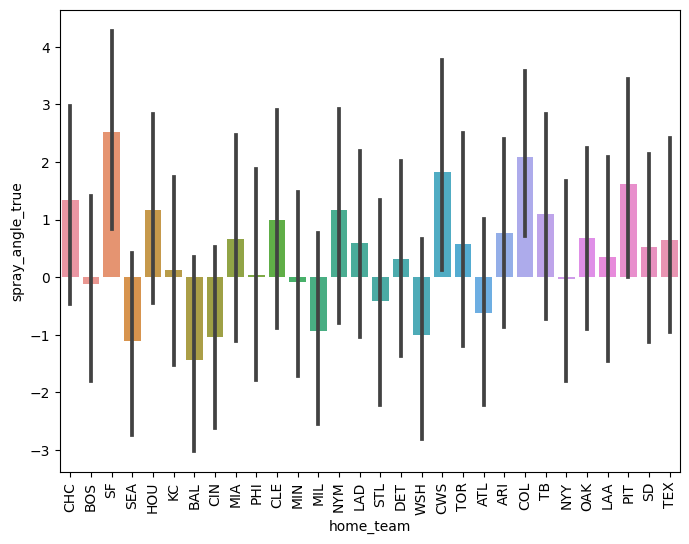

In [29]:
plt.figure(figsize=(8,6))

sns.barplot(hits_data, x='home_team', y='spray_angle_true', estimator='mean', errorbar=('ci',90))

plt.xticks(rotation=90)

plt.show()
